In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [71]:
# load Projekt.xlsx
df = pd.read_excel('Projekt.xlsx')

# display first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data exploration and cleaning

In [72]:
print("Dataset Info:")
df.info()

# Display statistical summary
print("\nStatistical Summary:")
df.describe()

# Check for missing values
print("\nMissing Values:")
df.isnull().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts   

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Drop unnecessary columns

In [73]:
df = df.drop(columns=['ID', 'Complain', 'Dt_Customer', 'Recency'])

Drop rows with missing 'Income'

In [74]:
df = df.dropna(subset=['Income'])

Change 'Year_Birth' to 'Age'

In [75]:
df['Age'] = datetime.now().year - df['Year_Birth']
df = df.drop(columns=['Year_Birth'])

Rename "Response" to "AcceptedCmp6"

In [76]:
df = df.rename(columns={'Response': 'AcceptedCmp6'})

## 'People' attributes

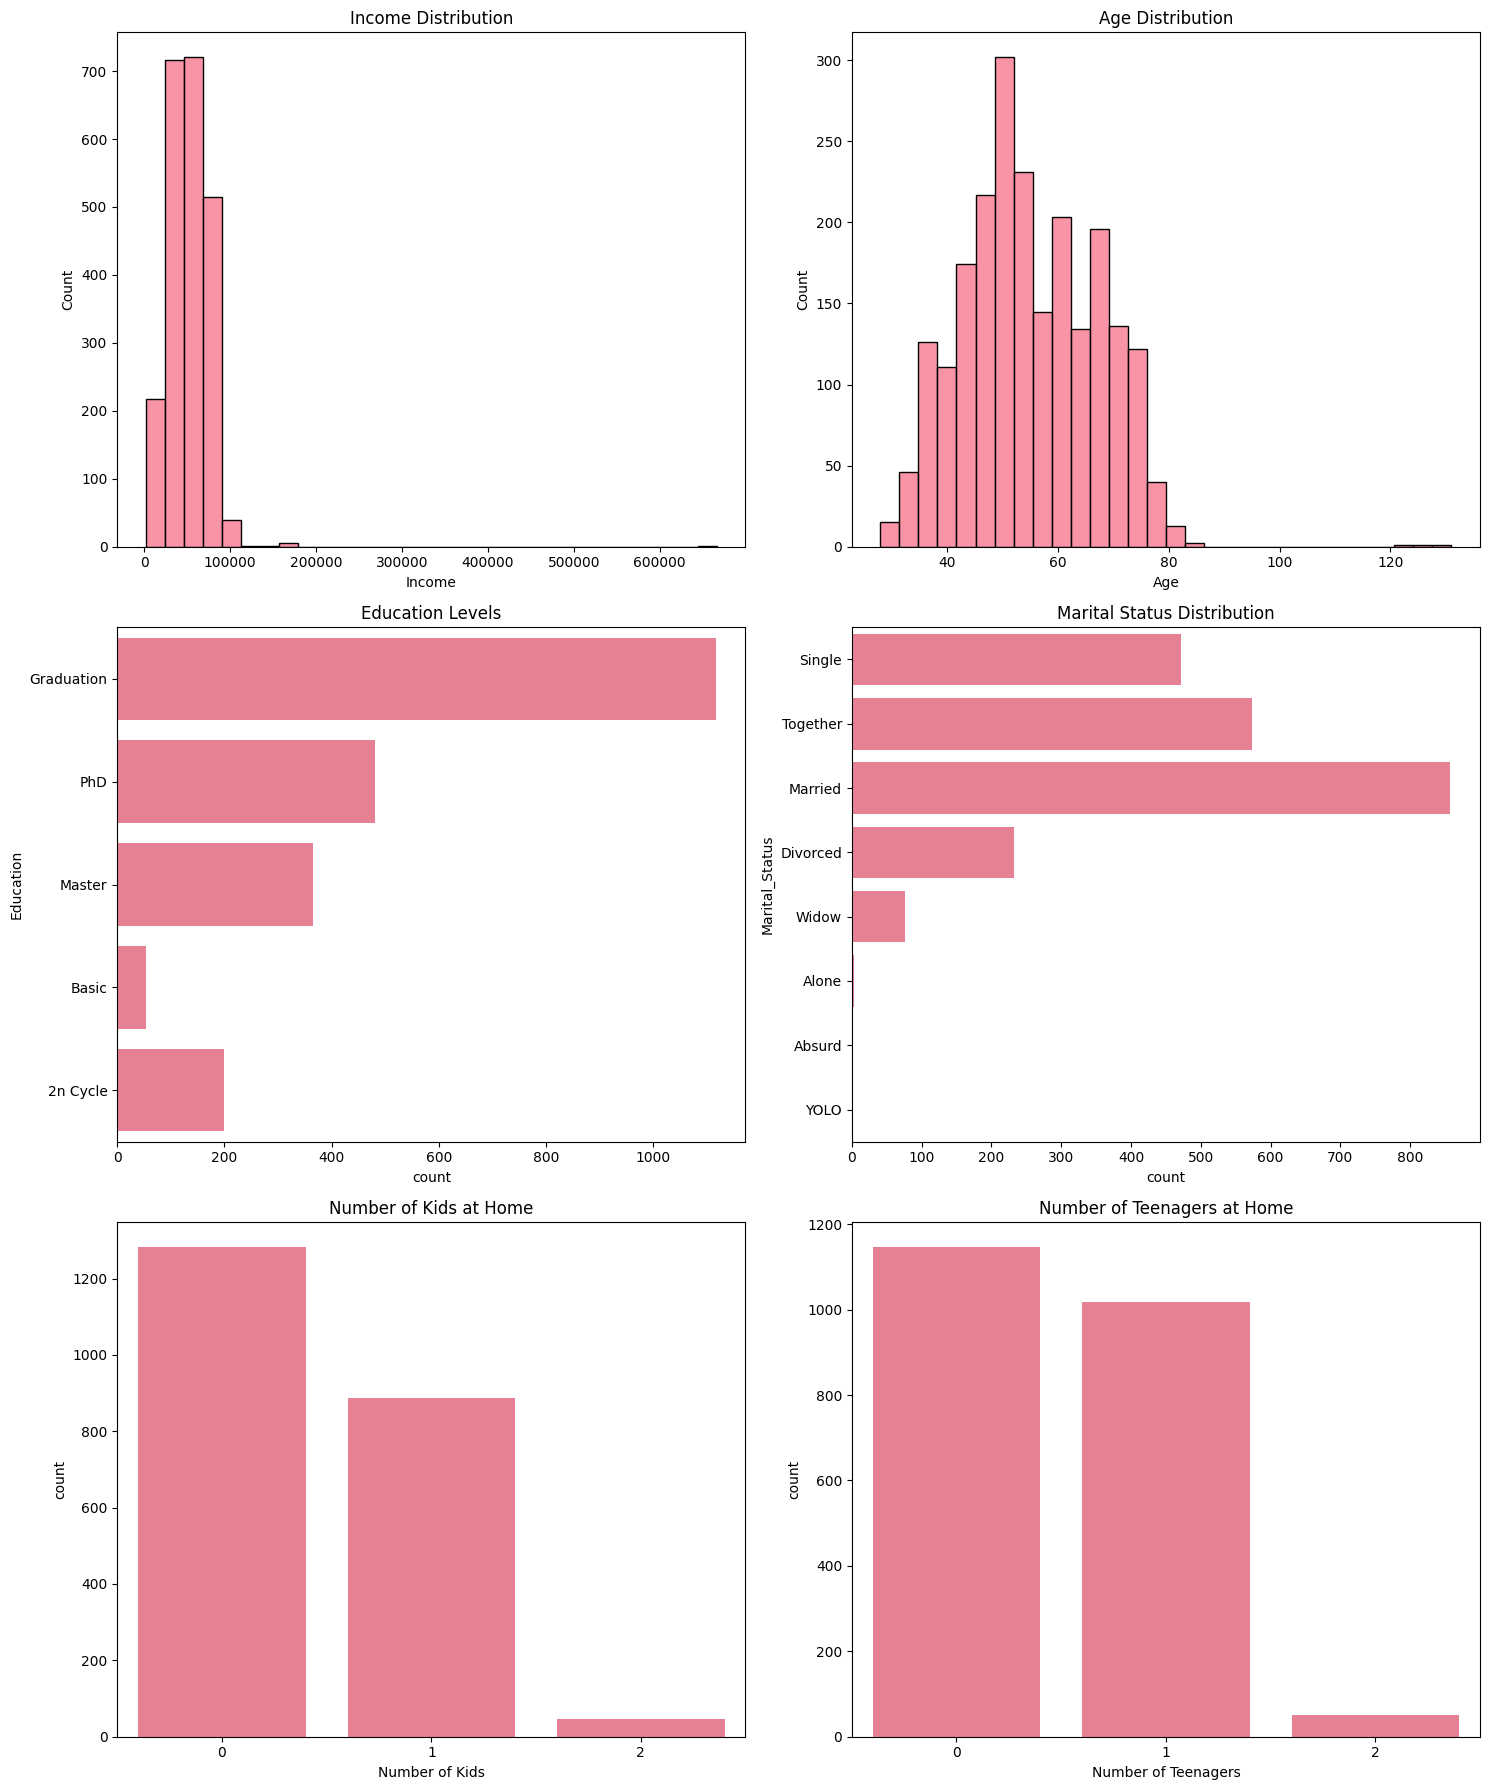

In [77]:
# Set up the visualization style
# plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Income distribution
sns.histplot(data=df, x='Income', bins=30, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('Income')

# Age distribution
sns.histplot(data=df, x='Age', bins=30, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')

# Education level distribution
sns.countplot(data=df, y='Education', ax=axes[1,0])
axes[1,0].set_title('Education Levels')

# Marital status distribution
sns.countplot(data=df, y='Marital_Status', ax=axes[1,1])
axes[1,1].set_title('Marital Status Distribution')

# Kids at home distribution
sns.countplot(data=df, x='Kidhome', ax=axes[2,0])
axes[2,0].set_title('Number of Kids at Home')
axes[2,0].set_xlabel('Number of Kids')

# Teens at home distribution
sns.countplot(data=df, x='Teenhome', ax=axes[2,1])
axes[2,1].set_title('Number of Teenagers at Home')
axes[2,1].set_xlabel('Number of Teenagers')

plt.tight_layout()
plt.show()

Drop rows with outlier Marital Status: 'Alone', 'Absurd', 'YOLO'

In [78]:
df = df[~df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]

Drop age outliers

In [79]:
df = df[df['Age'] < 100]

Drop income outliers

In [80]:
df = df[df['Income'] < 120000]

Add a new feature: 'Nr_Children'

In [81]:
df['Nr_Children'] = df['Kidhome'] + df['Teenhome']

Final visualization

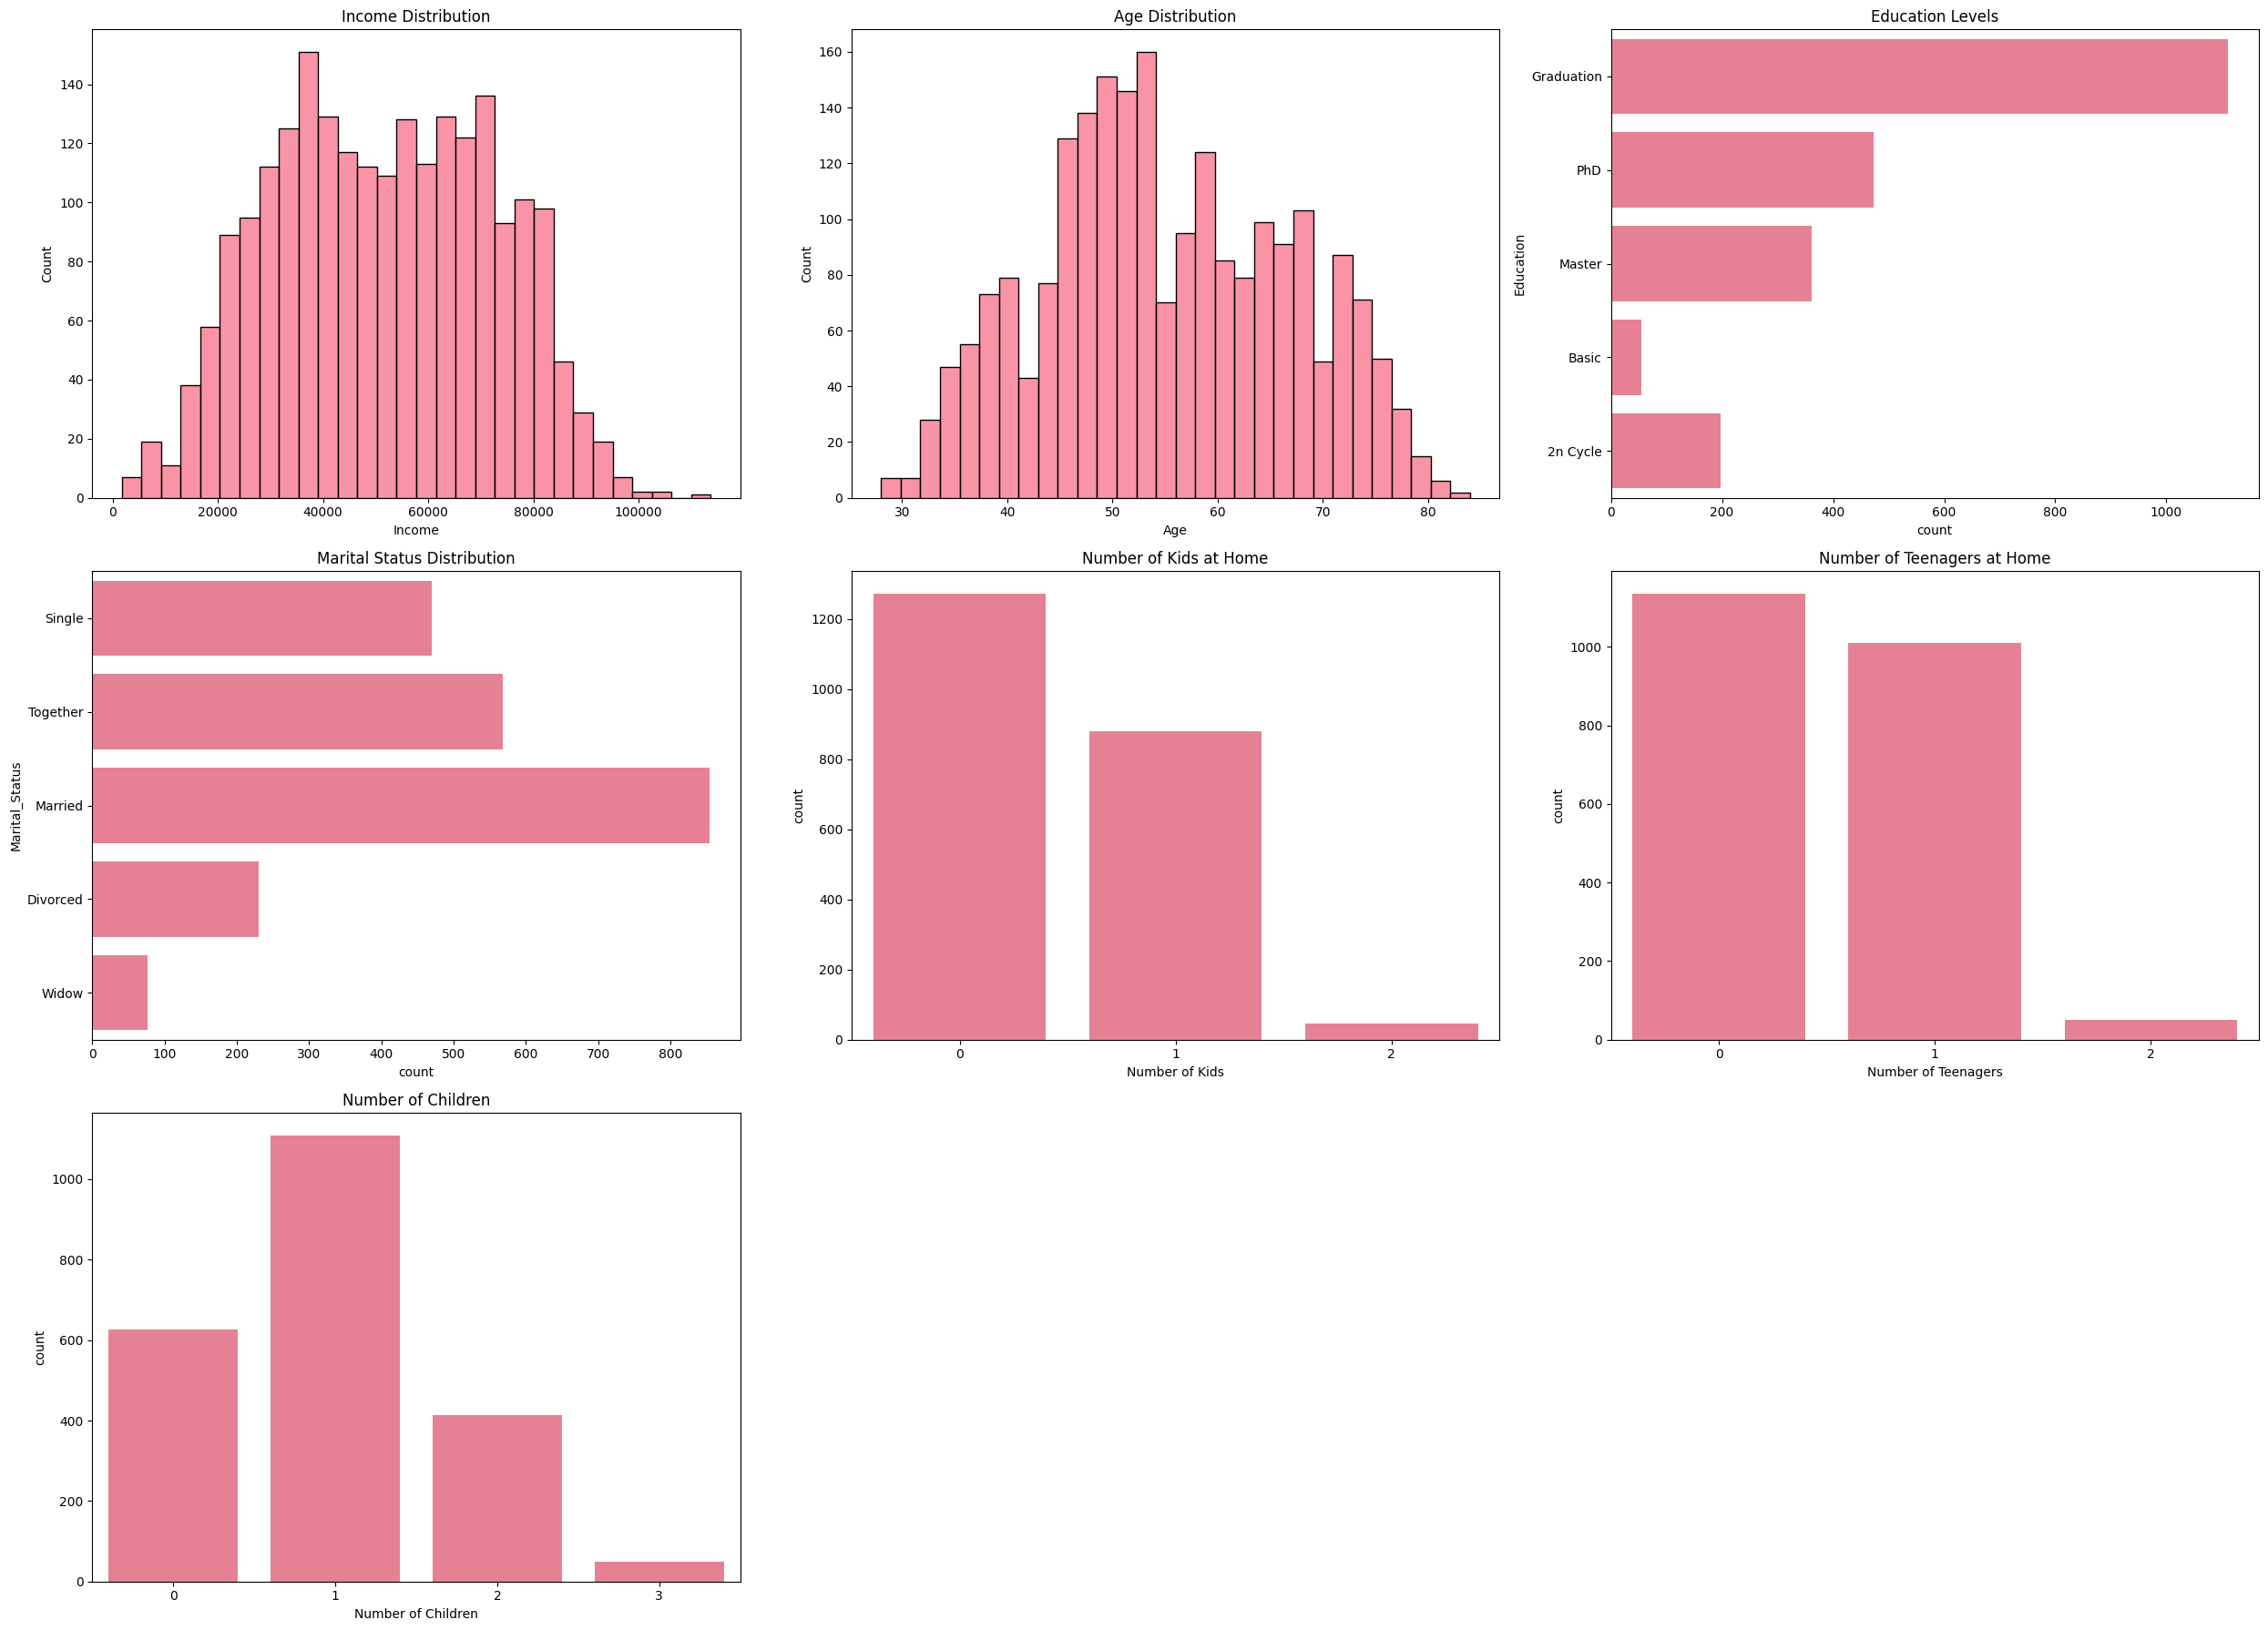

In [82]:
# Set up the visualization style
# plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(25, 18))

# Income distribution
sns.histplot(data=df, x='Income', bins=30, ax=axes[0,0])
axes[0,0].set_title('Income Distribution')
axes[0,0].set_xlabel('Income')

# Age distribution
sns.histplot(data=df, x='Age', bins=30, ax=axes[0,1])
axes[0,1].set_title('Age Distribution')

# Education level distribution
sns.countplot(data=df, y='Education', ax=axes[0,2])
axes[0,2].set_title('Education Levels')

# Marital status distribution
sns.countplot(data=df, y='Marital_Status', ax=axes[1,0])
axes[1,0].set_title('Marital Status Distribution')

# Kids at home distribution
sns.countplot(data=df, x='Kidhome', ax=axes[1,1])
axes[1,1].set_title('Number of Kids at Home')
axes[1,1].set_xlabel('Number of Kids')

# Teens at home distribution
sns.countplot(data=df, x='Teenhome', ax=axes[1,2])
axes[1,2].set_title('Number of Teenagers at Home')
axes[1,2].set_xlabel('Number of Teenagers')

# Nr_Children distribution
sns.countplot(data=df, x='Nr_Children', ax=axes[2,0])
axes[2,0].set_title('Number of Children')
axes[2,0].set_xlabel('Number of Children')


# don't show 2,1 and 2,2
axes[2,1].axis('off')
axes[2,2].axis('off')

plt.tight_layout()
plt.show()

### 'Products' attributes

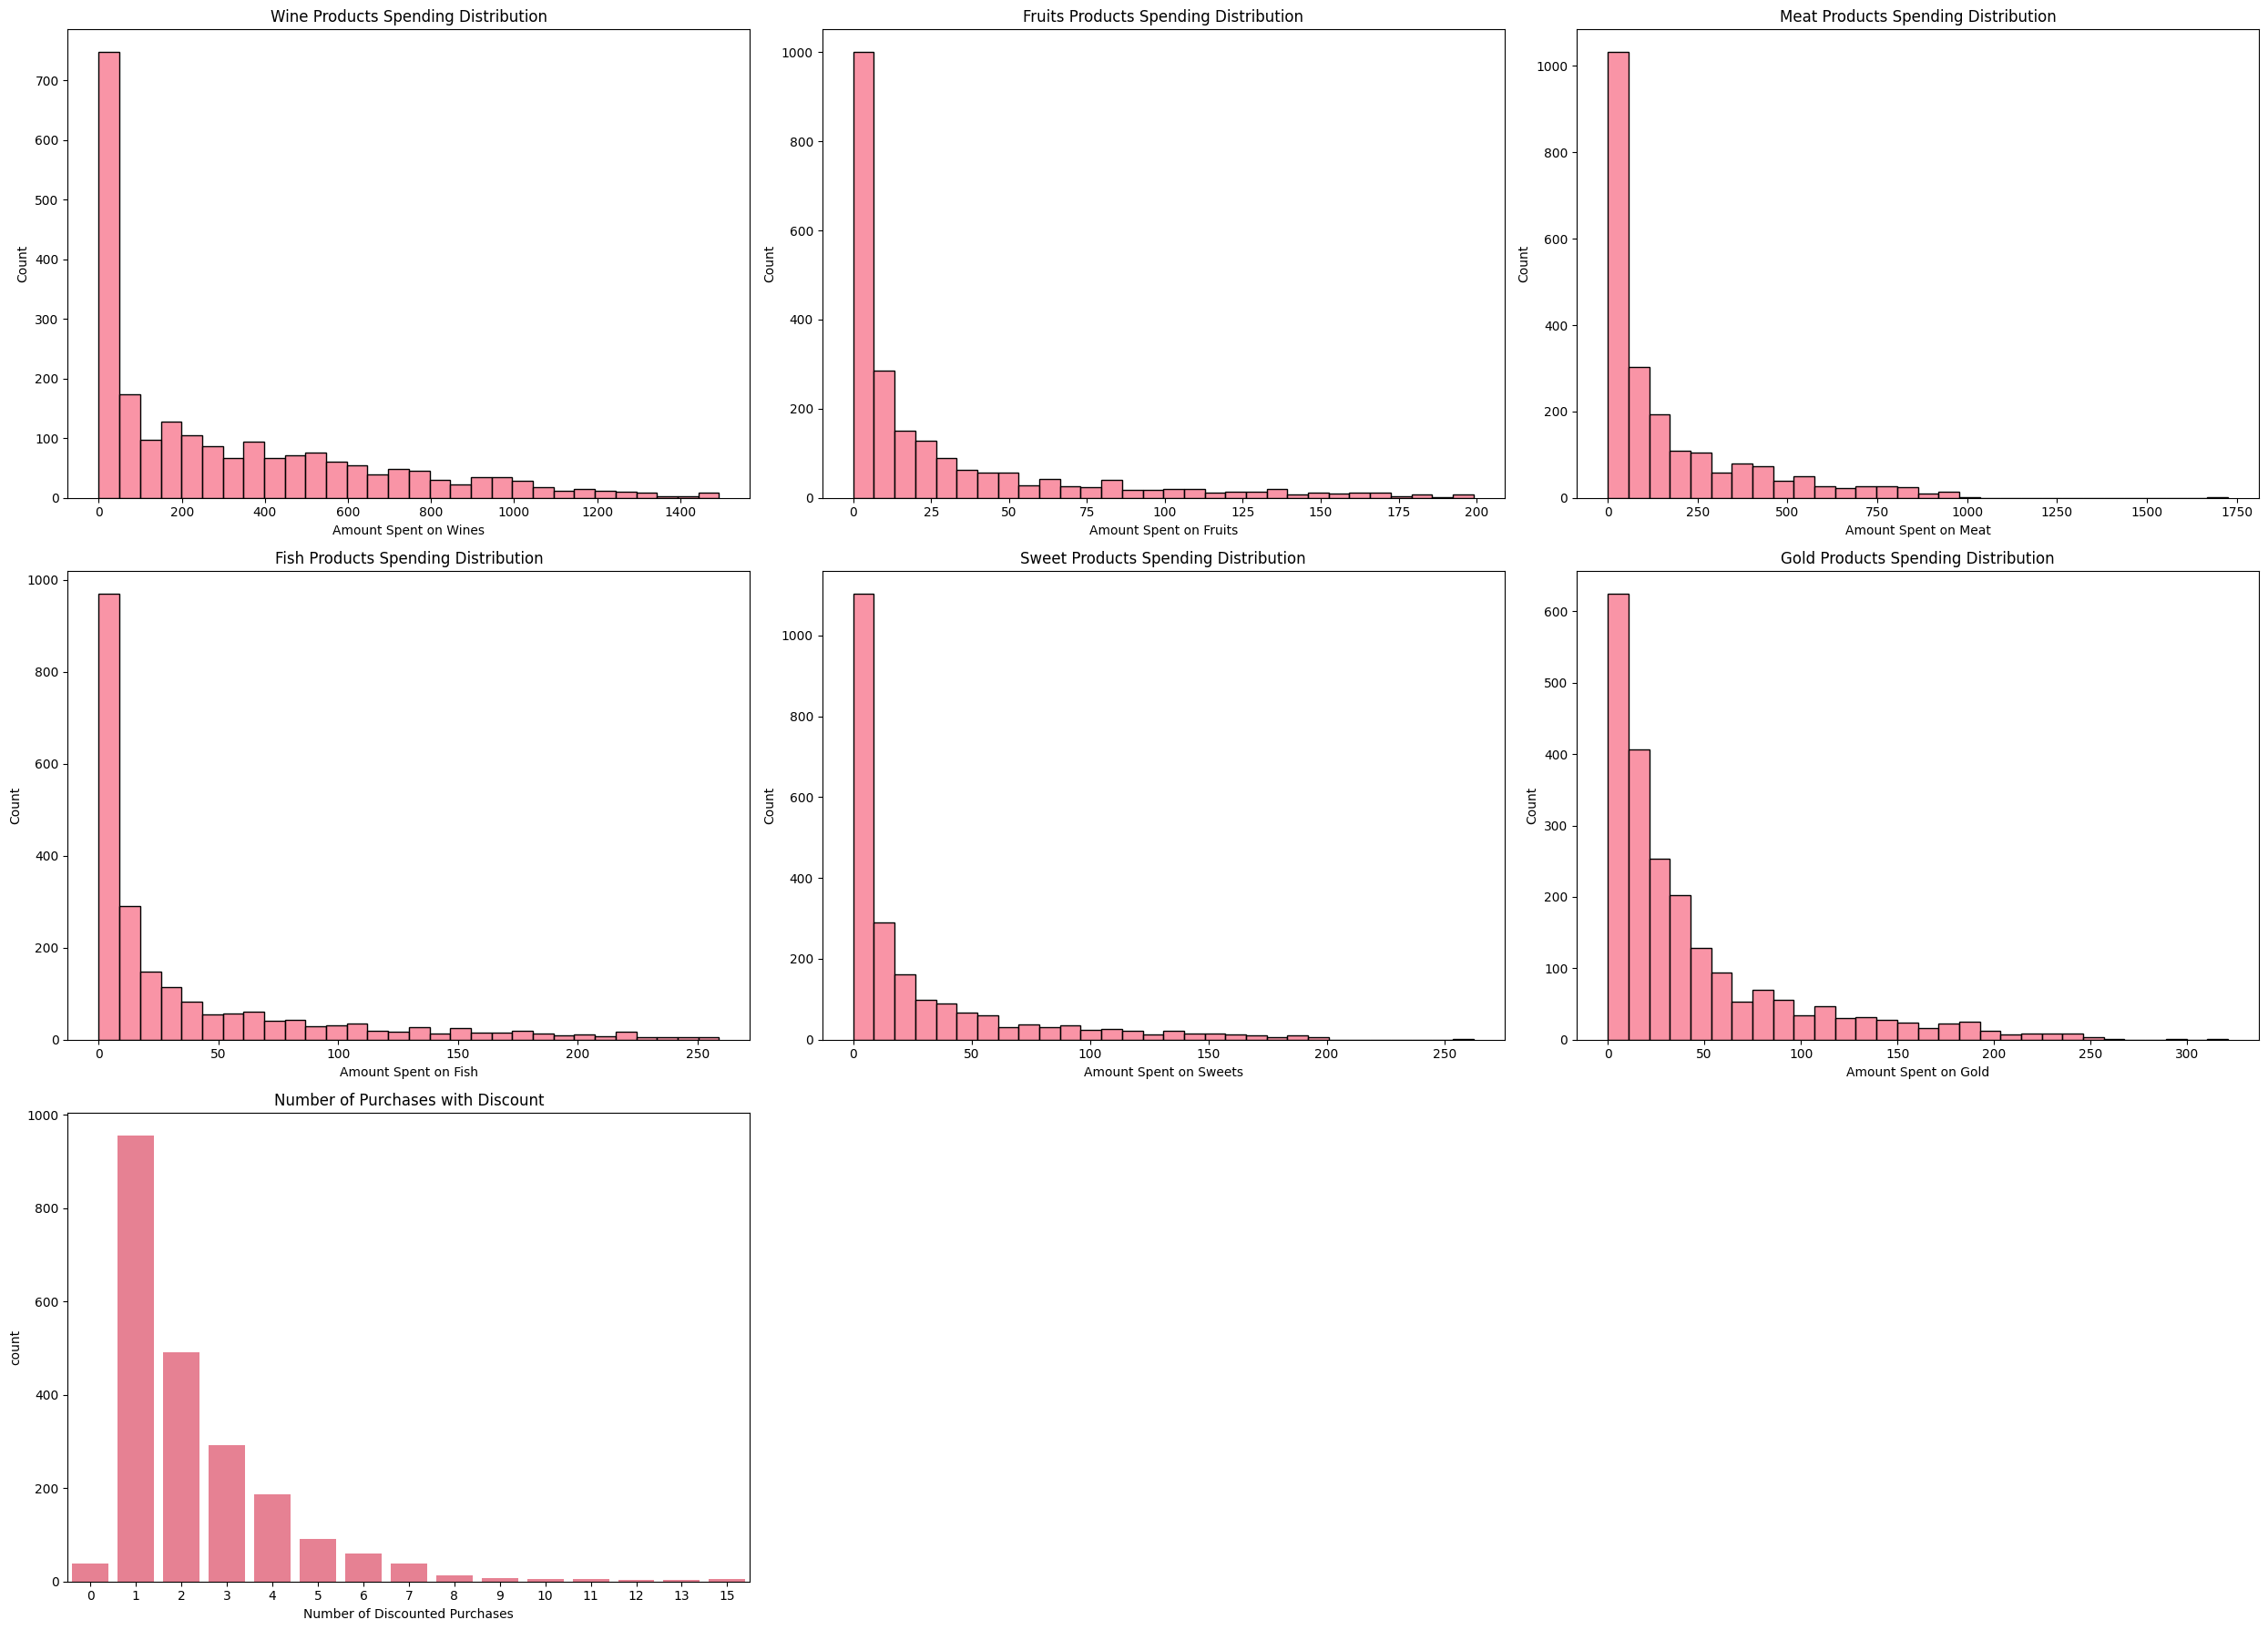

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(25, 18))

# MntWines distribution
sns.histplot(data=df, x='MntWines', bins=30, ax=axes[0,0])
axes[0,0].set_title('Wine Products Spending Distribution')
axes[0,0].set_xlabel('Amount Spent on Wines')

# MntFruits distribution
sns.histplot(data=df, x='MntFruits', bins=30, ax=axes[0,1])
axes[0,1].set_title('Fruits Products Spending Distribution')
axes[0,1].set_xlabel('Amount Spent on Fruits')

# MntMeatProducts distribution
sns.histplot(data=df, x='MntMeatProducts', bins=30, ax=axes[0,2])
axes[0,2].set_title('Meat Products Spending Distribution')
axes[0,2].set_xlabel('Amount Spent on Meat')

# MntFishProducts distribution
sns.histplot(data=df, x='MntFishProducts', bins=30, ax=axes[1,0])
axes[1,0].set_title('Fish Products Spending Distribution')
axes[1,0].set_xlabel('Amount Spent on Fish')

# MntSweetProducts distribution
sns.histplot(data=df, x='MntSweetProducts', bins=30, ax=axes[1,1])
axes[1,1].set_title('Sweet Products Spending Distribution')
axes[1,1].set_xlabel('Amount Spent on Sweets')

# MntGoldProds distribution
sns.histplot(data=df, x='MntGoldProds', bins=30, ax=axes[1,2])
axes[1,2].set_title('Gold Products Spending Distribution')
axes[1,2].set_xlabel('Amount Spent on Gold')

# NumDealsPurchases distribution
sns.countplot(data=df, x='NumDealsPurchases', ax=axes[2,0])
axes[2,0].set_title('Number of Purchases with Discount')
axes[2,0].set_xlabel('Number of Discounted Purchases')

# don't show 2,1 and 2,2
axes[2,1].axis('off')
axes[2,2].axis('off')

plt.tight_layout()
plt.show()

### 'Promotion' attributes

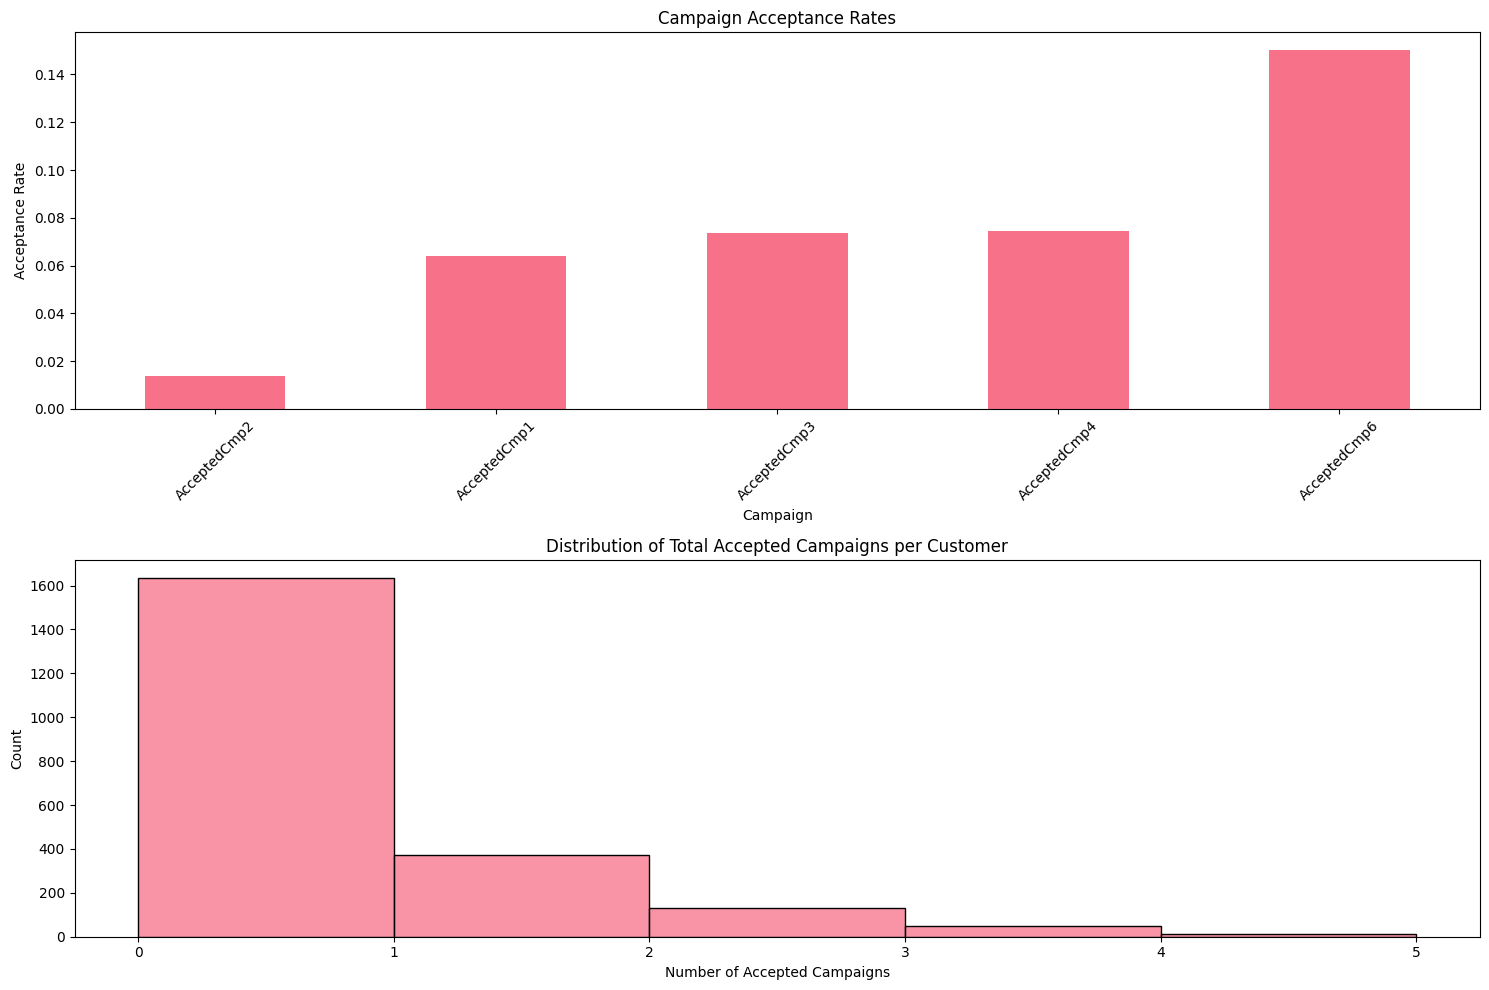

In [84]:
# Set up the figure and axes for promotion visualizations
plt.figure(figsize=(15,10))

# Plot acceptance rates for all campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp6']
acceptance_rates = df[campaign_cols].mean().sort_values(ascending=True)

plt.subplot(2,1,1)
acceptance_rates.plot(kind='bar')
plt.title('Campaign Acceptance Rates')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)

# Plot total number of accepted campaigns per customer
plt.subplot(2,1,2)
total_accepted = df[campaign_cols].sum(axis=1)
sns.histplot(data=total_accepted, bins=range(0, total_accepted.max()+2))
plt.title('Distribution of Total Accepted Campaigns per Customer')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### 'Place' attributes

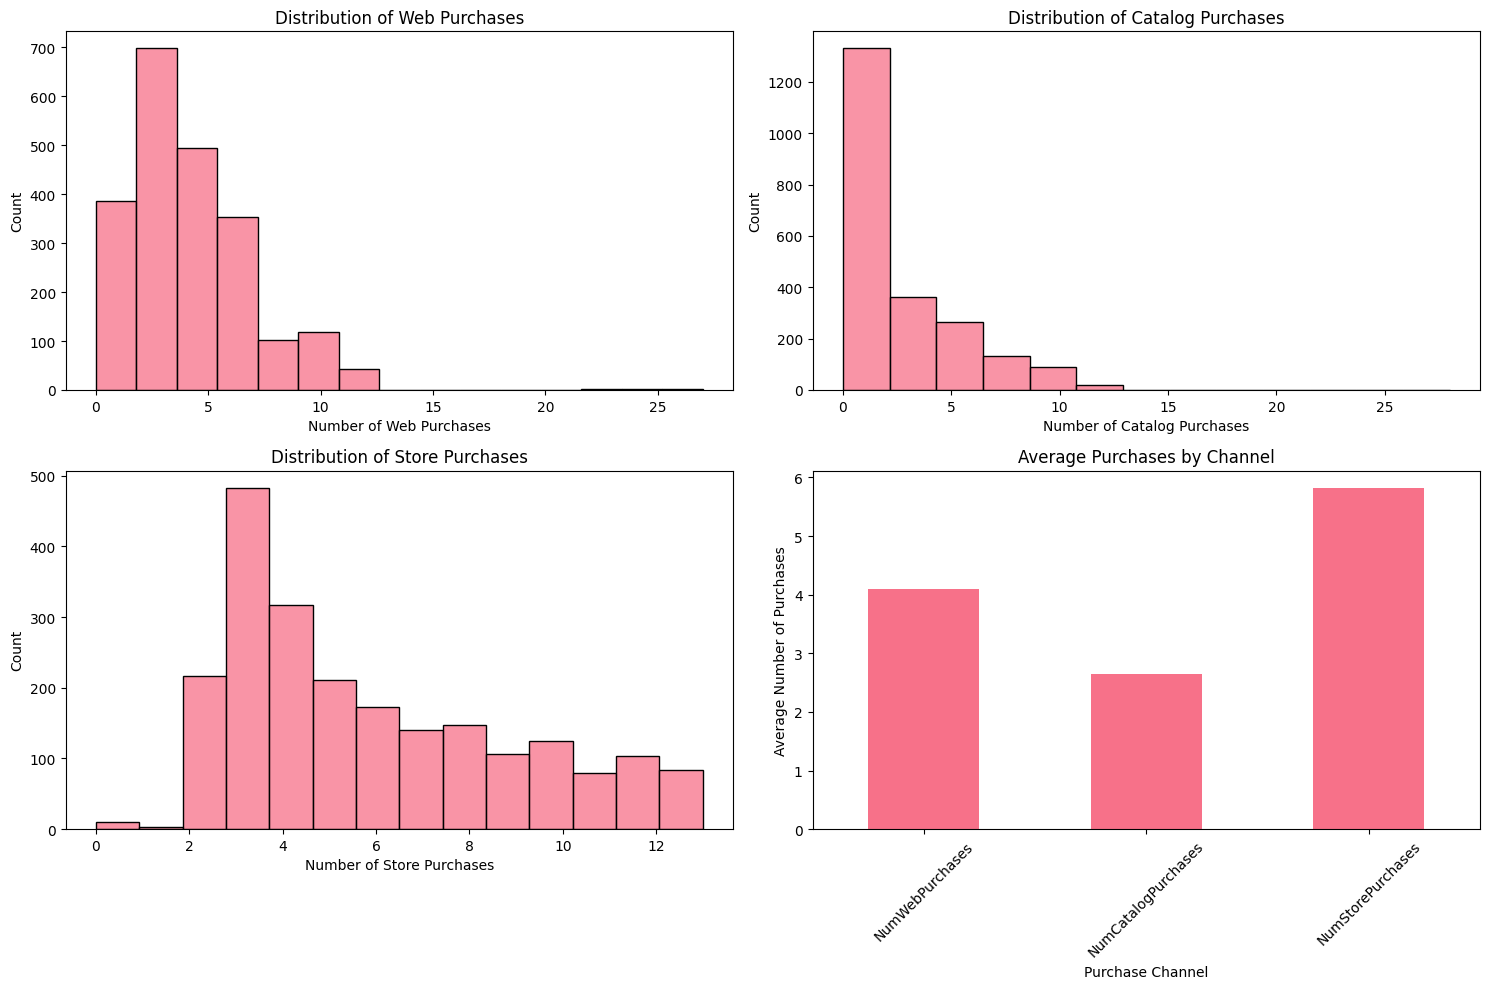

In [85]:
# Set up the figure and axes for place-related visualizations
plt.figure(figsize=(15,10))

# Plot distribution of web purchases
plt.subplot(2,2,1)
sns.histplot(data=df['NumWebPurchases'], bins=min(20, df['NumWebPurchases'].unique().size))
plt.title('Distribution of Web Purchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Count')

# Plot distribution of catalog purchases
plt.subplot(2,2,2)
sns.histplot(data=df['NumCatalogPurchases'], bins=min(20, df['NumCatalogPurchases'].unique().size))
plt.title('Distribution of Catalog Purchases')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Count')

# Plot distribution of store purchases
plt.subplot(2,2,3)
sns.histplot(data=df['NumStorePurchases'], bins=min(20, df['NumStorePurchases'].unique().size))
plt.title('Distribution of Store Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Count')

# Plot average purchases by channel
plt.subplot(2,2,4)
purchase_means = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
purchase_means.plot(kind='bar')
plt.title('Average Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Cut outliers

In [86]:
# web purchases
df = df[df['NumWebPurchases'] < 15]

# catalog purchases
df = df[df['NumCatalogPurchases'] < 15]

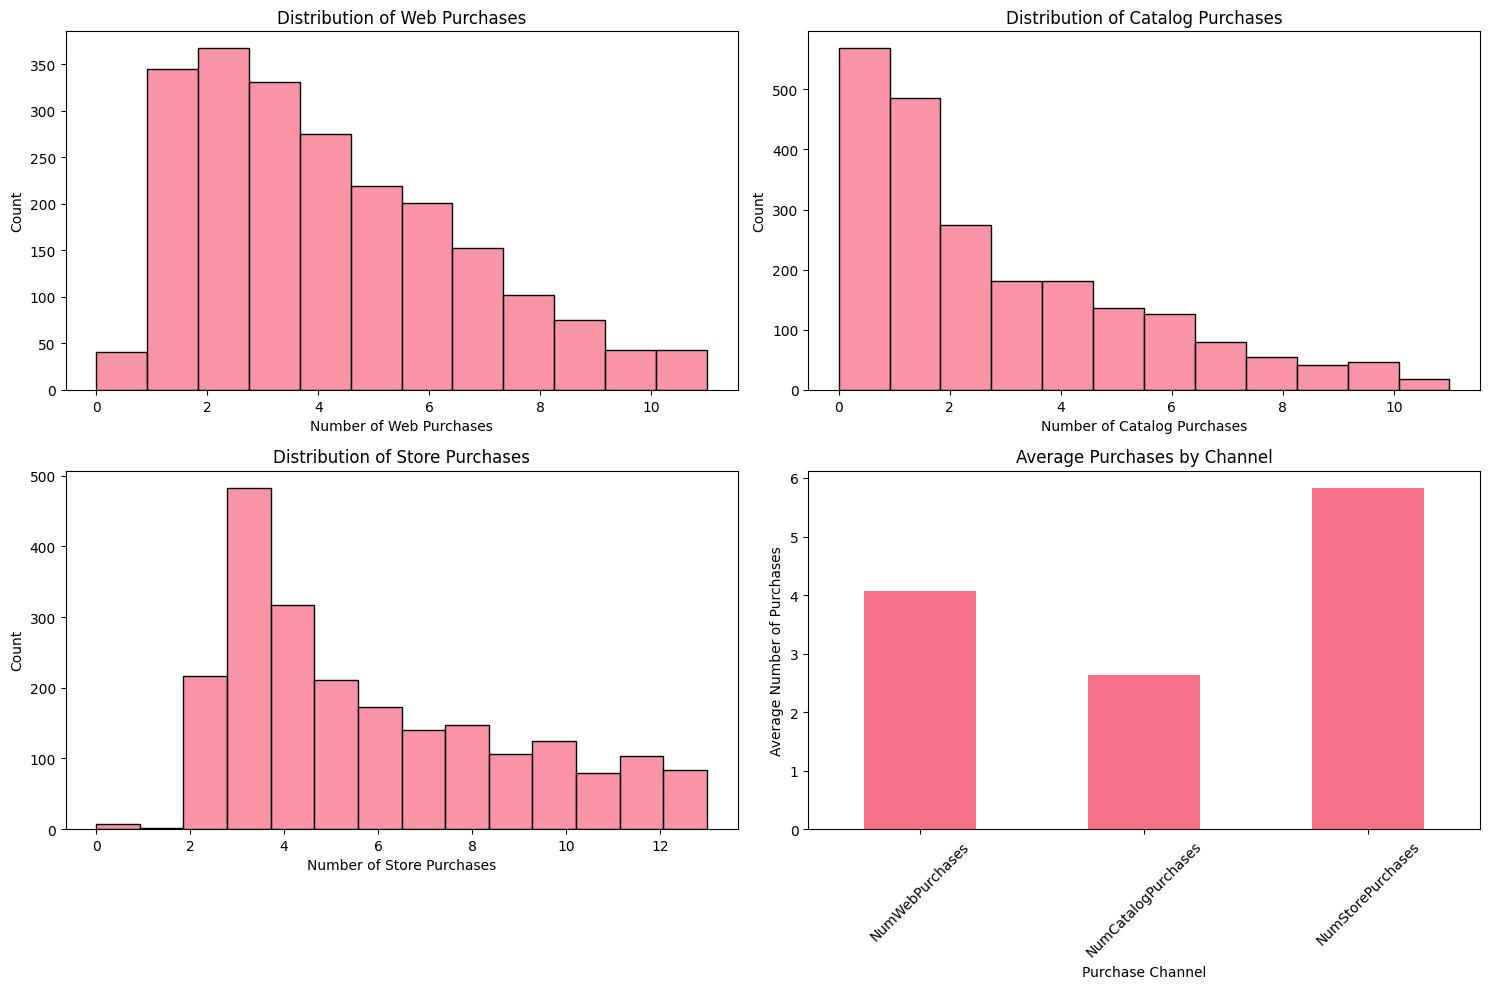

In [87]:

# Set up the figure and axes for place-related visualizations
plt.figure(figsize=(15,10))

# Plot distribution of web purchases
plt.subplot(2,2,1)
sns.histplot(data=df['NumWebPurchases'], bins=min(20, df['NumWebPurchases'].unique().size))
plt.title('Distribution of Web Purchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Count')

# Plot distribution of catalog purchases
plt.subplot(2,2,2)
sns.histplot(data=df['NumCatalogPurchases'], bins=min(20, df['NumCatalogPurchases'].unique().size))
plt.title('Distribution of Catalog Purchases')
plt.xlabel('Number of Catalog Purchases')
plt.ylabel('Count')

# Plot distribution of store purchases
plt.subplot(2,2,3)
sns.histplot(data=df['NumStorePurchases'], bins=min(20, df['NumStorePurchases'].unique().size))
plt.title('Distribution of Store Purchases')
plt.xlabel('Number of Store Purchases')
plt.ylabel('Count')

# Plot average purchases by channel
plt.subplot(2,2,4)
purchase_means = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
purchase_means.plot(kind='bar')
plt.title('Average Purchases by Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("cleaned.csv")